I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score 
dta = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                 religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [2]:
dta.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [3]:
dta.tail(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6356,5.0,32.0,13.0,3.0,3.0,12.0,3.0,5.0,0.0,0
6357,5.0,32.0,13.0,4.0,2.0,14.0,4.0,4.0,0.0,0
6358,3.0,27.0,6.0,2.0,4.0,14.0,3.0,1.0,0.0,0
6359,4.0,22.0,2.5,0.0,3.0,16.0,5.0,5.0,0.0,0
6360,5.0,22.0,2.5,0.0,2.0,14.0,3.0,3.0,0.0,0
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [4]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [6]:
dta.loc[:,'affairs':'affairs'].describe()

,affairs
count,6366.000000
mean,0.705374
std,2.203374
min,0.000000
25%,0.000000
50%,0.000000
75%,0.484848
max,57.599991


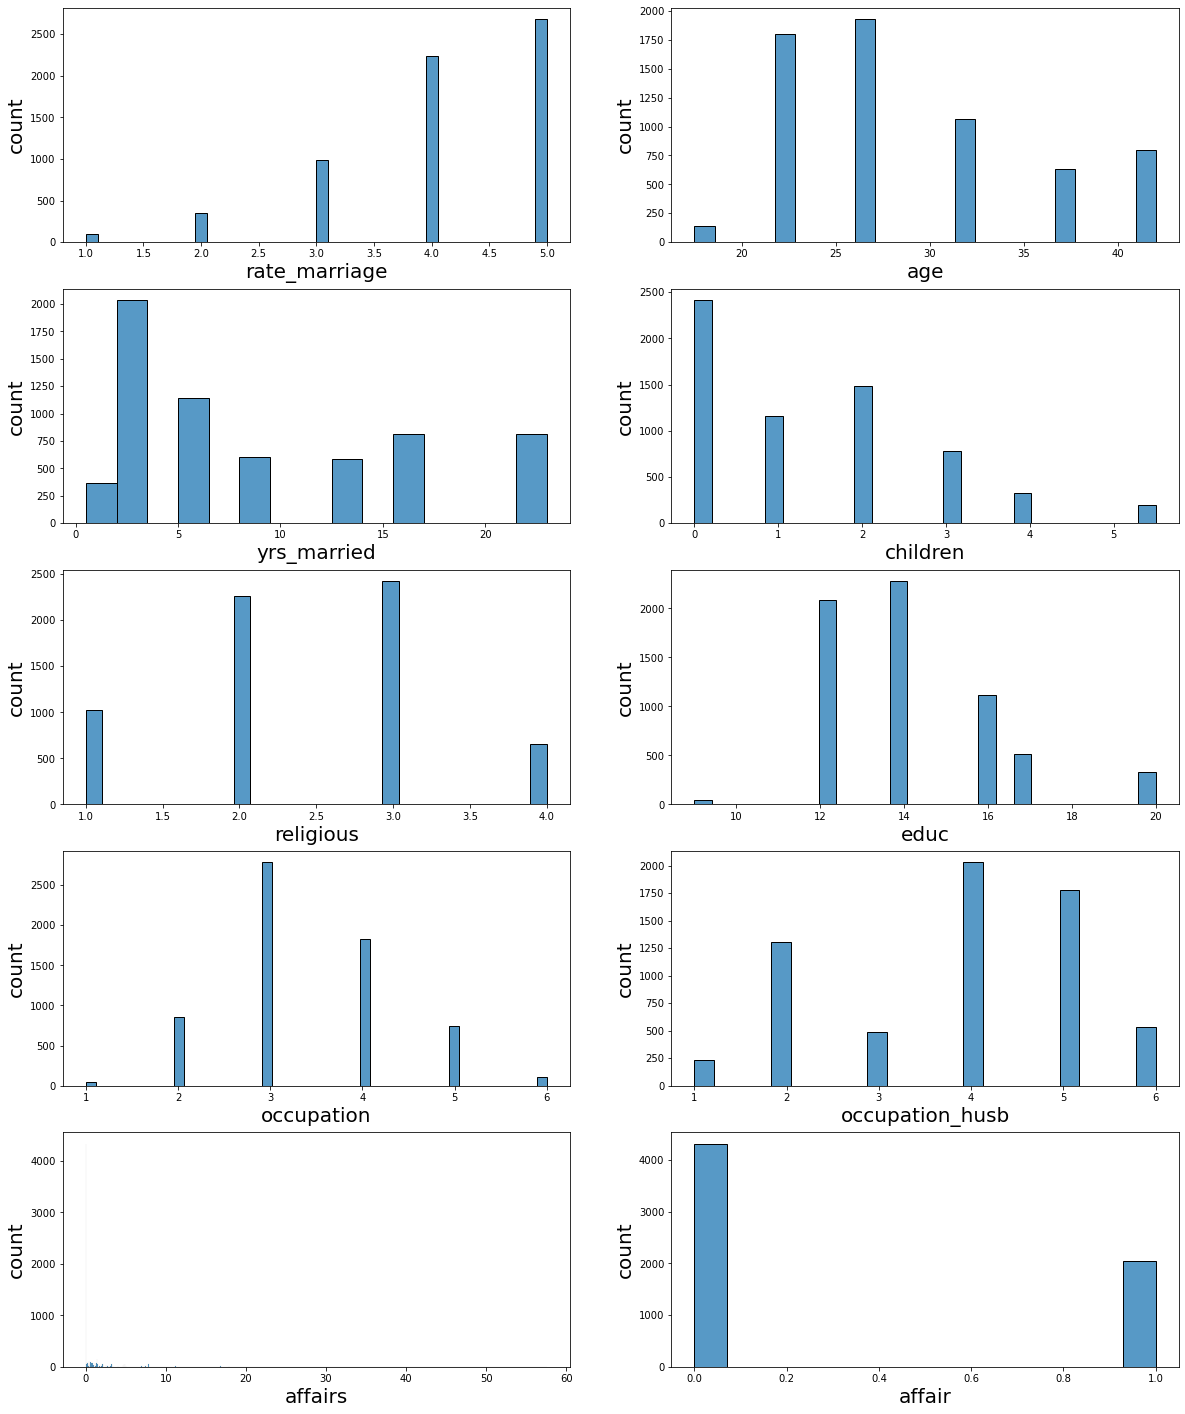

In [7]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=10 :     # as there are 9 columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(dta[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='affair', ylabel='religious'>

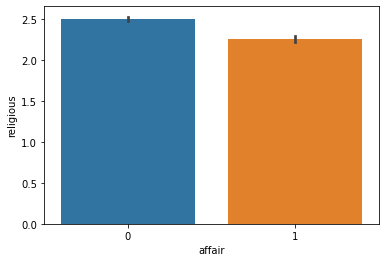

In [8]:
sns.barplot(x='affair',y='religious',data=dta)

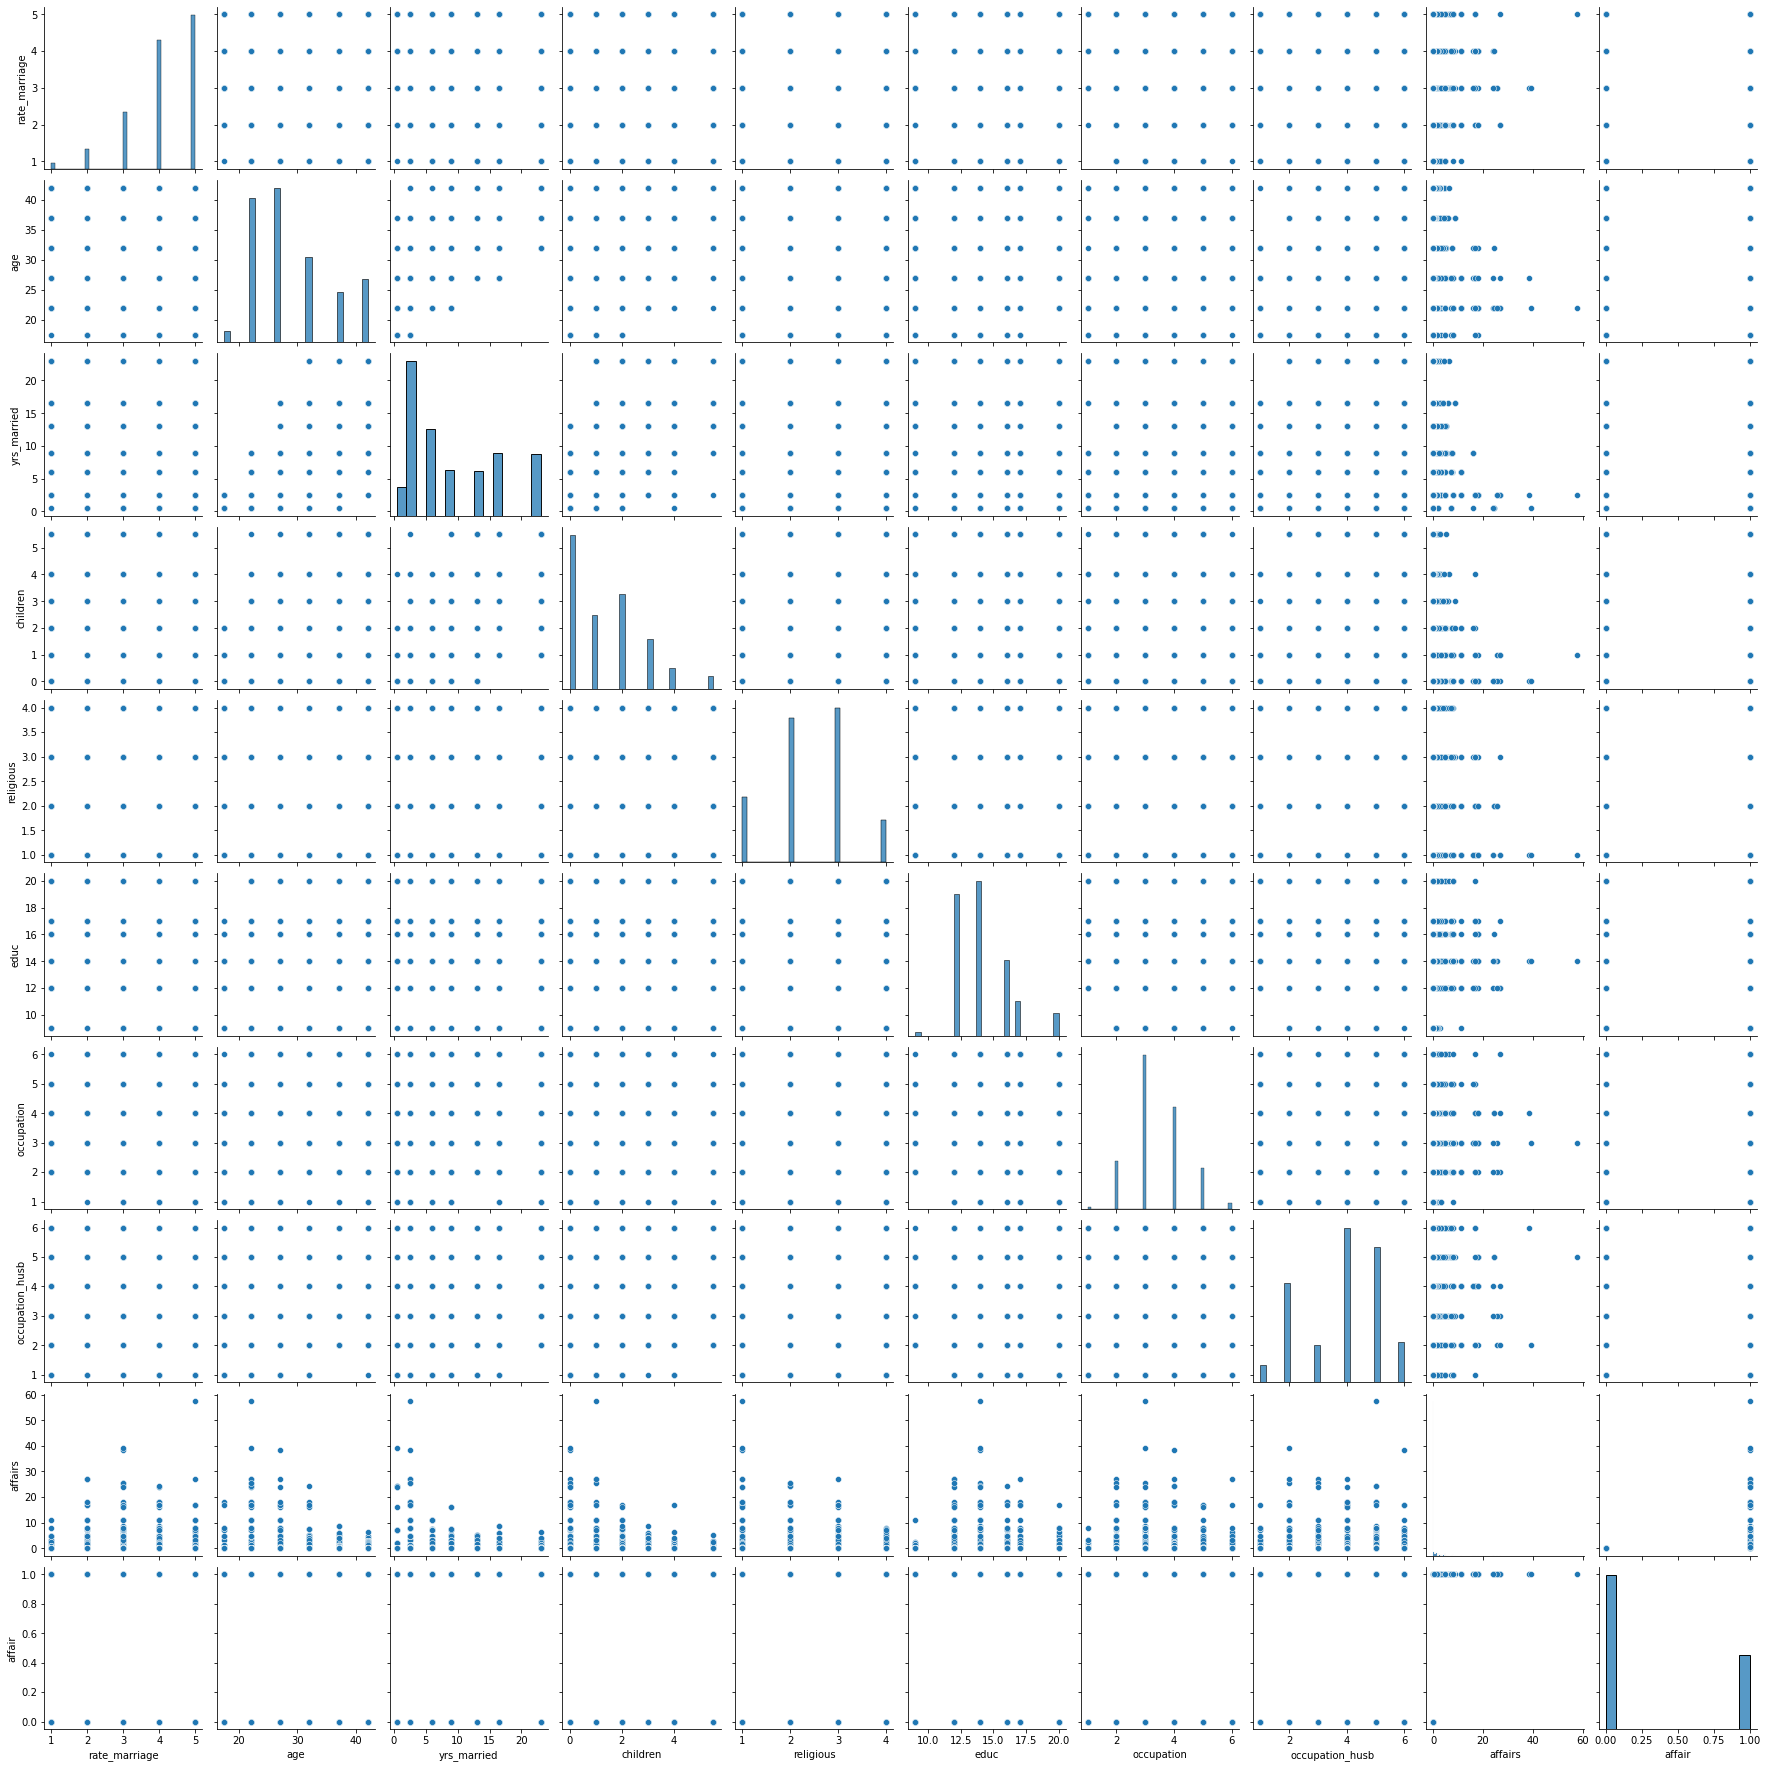

In [9]:
sns.pairplot(dta)

Text(0, 0.5, 'Frequency')

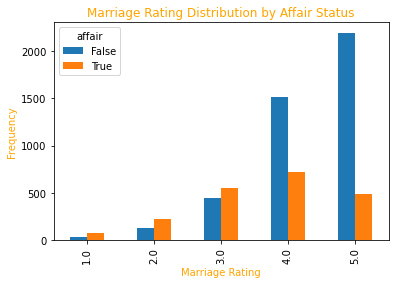

In [10]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status',fontdict={'color': 'orange'})
plt.xlabel('Marriage Rating',fontdict={'color': 'orange'})
plt.ylabel('Frequency',fontdict={'color': 'orange'})

Text(0, 0.5, 'Percentage')

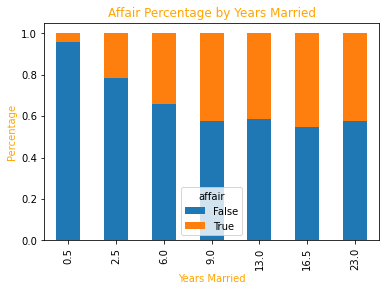

In [11]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married',fontdict={'color': 'orange'})
plt.xlabel('Years Married',fontdict={'color': 'orange'})
plt.ylabel('Percentage',fontdict={'color': 'orange'})

<AxesSubplot:>

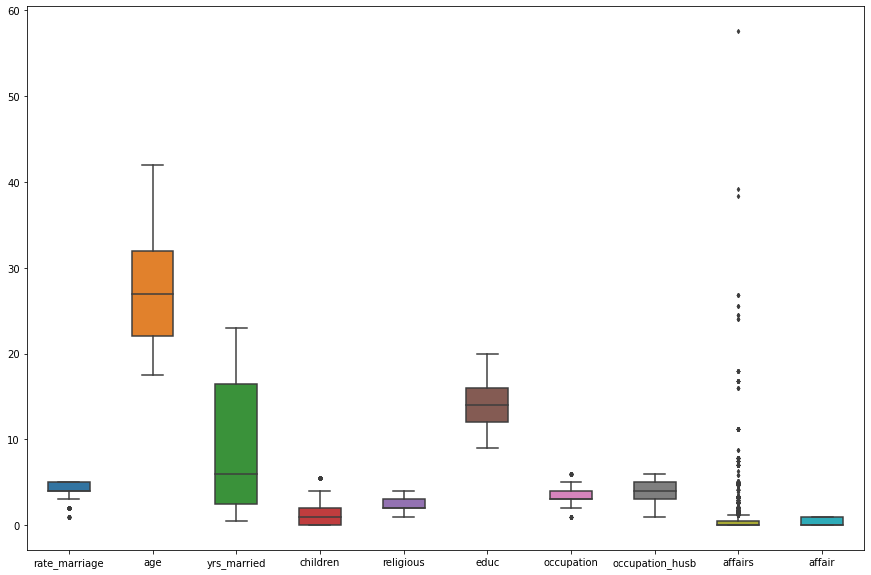

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

In [13]:
q = dta['affairs'].quantile(0.95)
# we are removing the top 5% data from the affairs column
data_cleaned = dta[dta['affairs']<q]

data_cleaned

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


<AxesSubplot:>

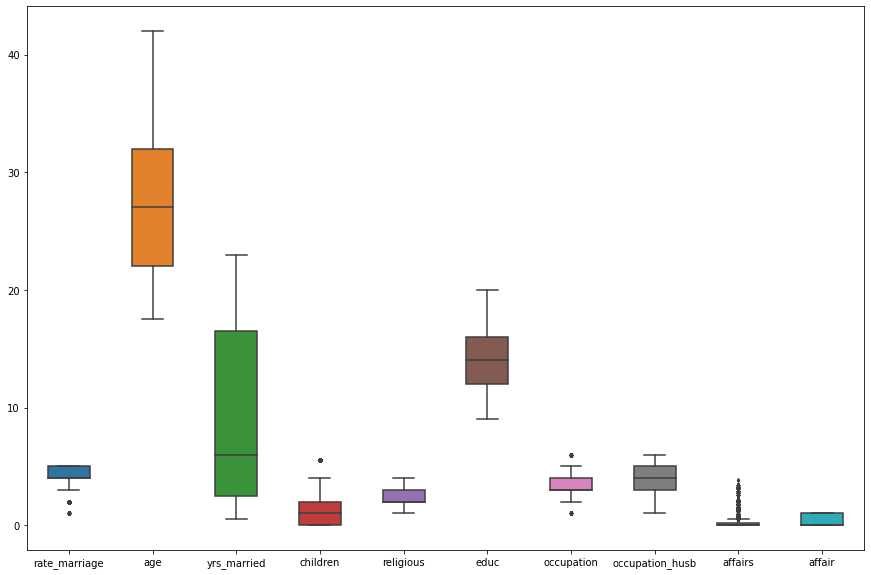

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [15]:
X = dta.drop(columns = ['affair'])
y = dta['affair']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

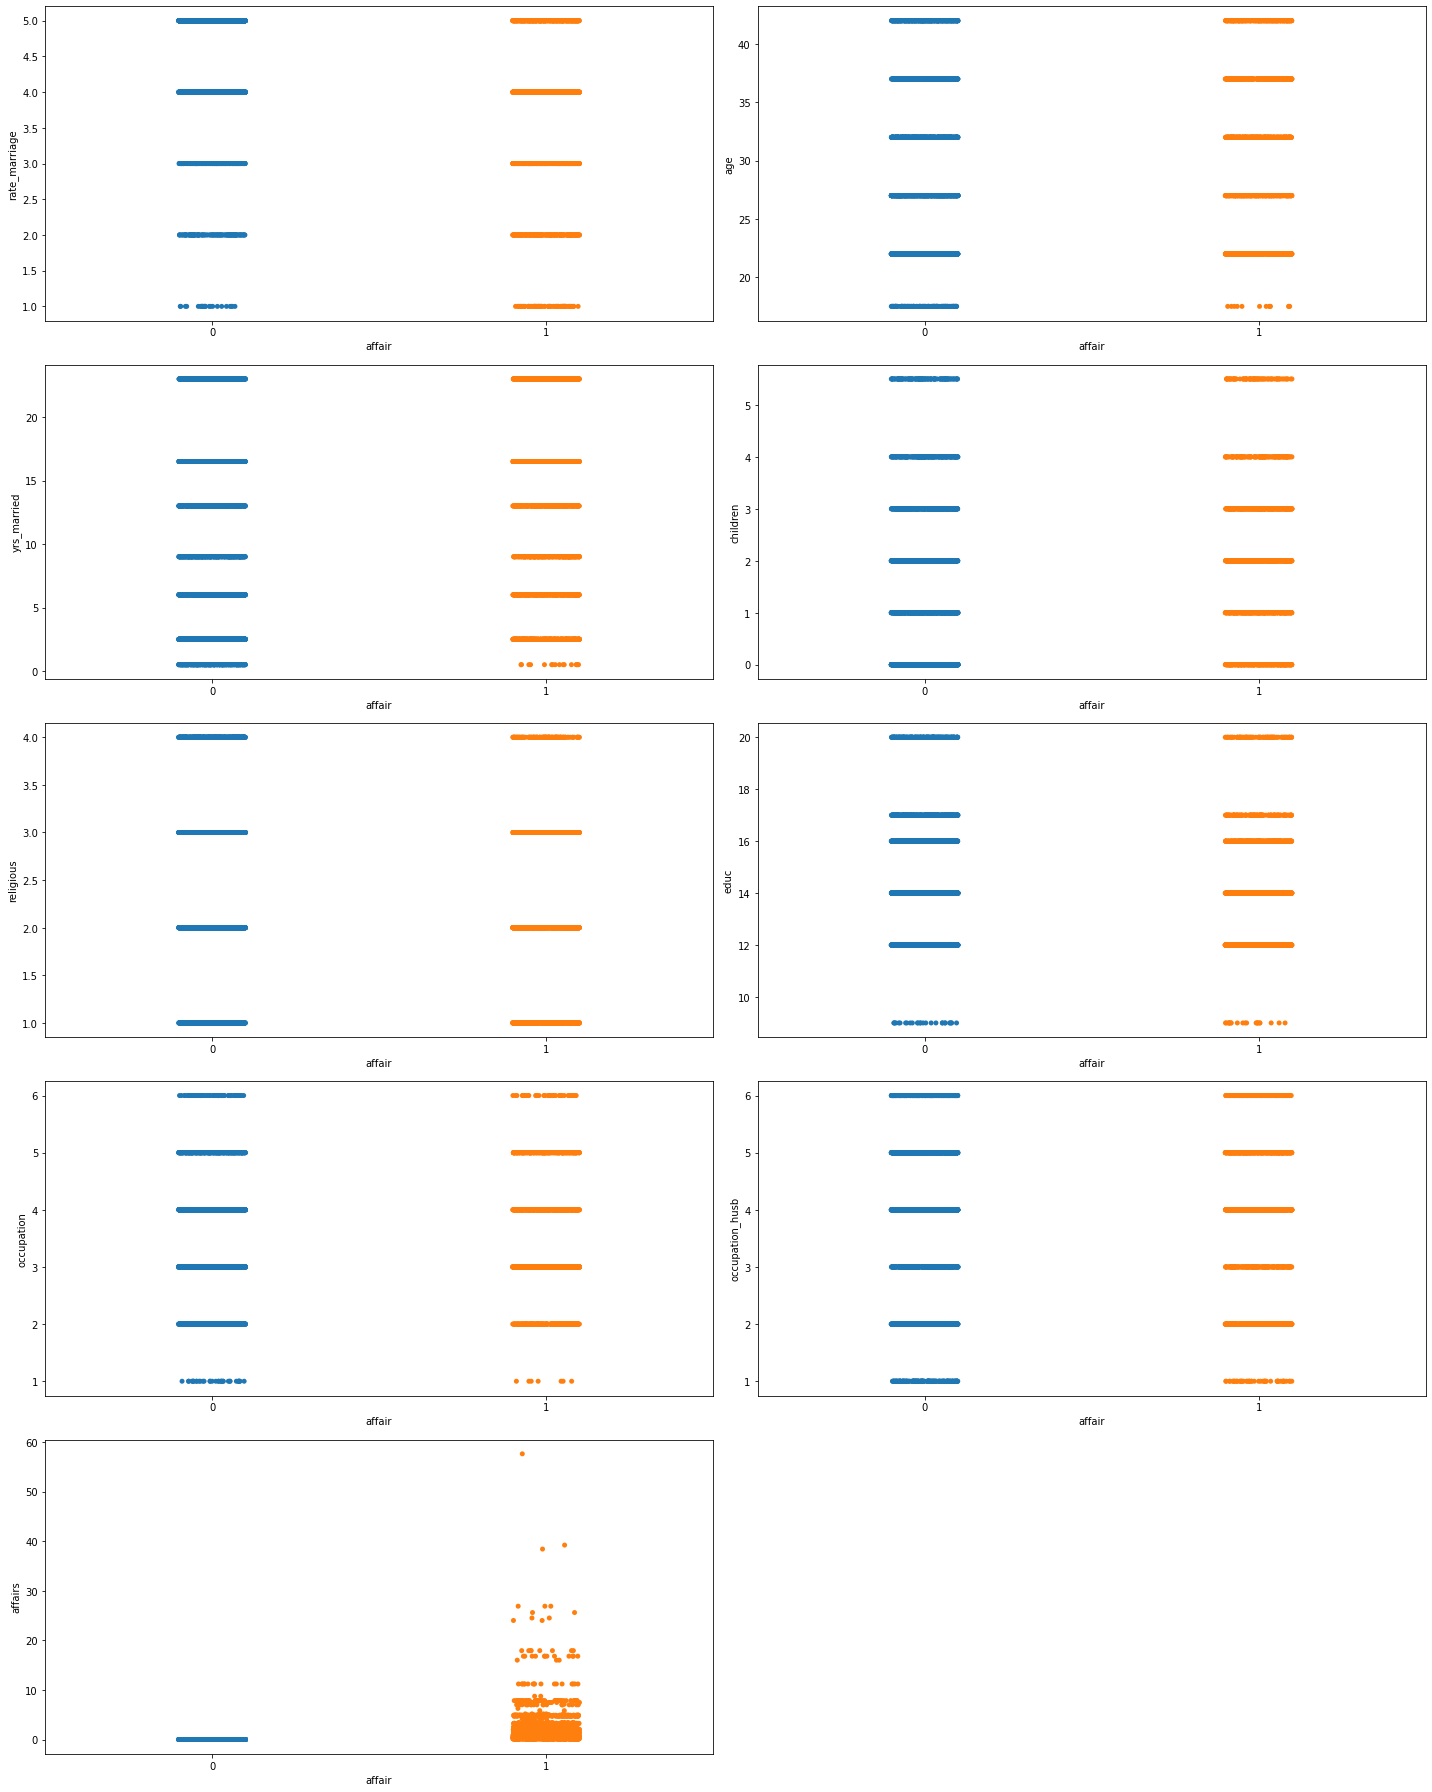

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [18]:
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
        -1.51129246e+00,  8.54069123e-01, -2.69727036e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -4.50087100e-01,  1.11309009e-01,  1.14623935e+00],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01,  8.54069123e-01,  3.15280273e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01, -2.11697133e+00, -3.20158710e-01],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -4.50087100e-01,  1.11309009e-01, -3.20158710e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -1.51129246e+00,  1.11309009e-01, -3.20158710e-01]])

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.070420,rate_marriage
1,5.456286,age
2,7.145901,yrs_married
3,2.529103,children
4,1.046895,religious
5,1.296556,educ
6,1.207701,occupation
7,1.082883,occupation_husb
8,1.057968,affairs


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [21]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [22]:
log_reg1 = LogisticRegression()
log_reg1.fit(X,y)

LogisticRegression()

In [23]:
log_reg1.score(X,y)

0.9781652529060635

In [24]:
y.mean()

0.3224945020420987

In [26]:
log_reg2 = LogisticRegression()
log_reg2.fit(x_train,y_train)

LogisticRegression()

In [27]:
prediction = log_reg2.predict(X_test)
prediction

NameError: name 'X_test' is not defined

In [29]:
probs = log_reg2.predict_proba(x_test)
probs

array([[9.02672945e-01, 9.73270547e-02],
       [9.49594826e-01, 5.04051736e-02],
       [9.82444435e-01, 1.75555651e-02],
       ...,
       [1.26654764e-04, 9.99873345e-01],
       [7.21964397e-01, 2.78035603e-01],
       [9.42948351e-01, 5.70516486e-02]])

In [30]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

Let's see how well our model performs on the test data set.

In [31]:
y_pred = log_reg.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.960427135678392

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1084,    0],
       [  63,  445]], dtype=int64)

In [34]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [35]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.960427135678392

In [36]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [37]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9450741063644289

In [38]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9717615419094576

In [39]:
from sklearn.metrics import roc_auc_score
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.937992125984252

ROC

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

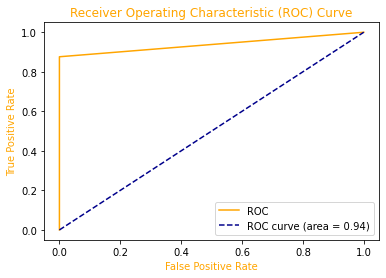

In [41]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate',fontdict={'color': 'orange'})
plt.ylabel('True Positive Rate',fontdict={'color': 'orange'})
plt.title('Receiver Operating Characteristic (ROC) Curve',fontdict={'color': 'orange'})
plt.legend()
plt.show()